# Tanya Jain - 19A1HP078

In [2]:
import pandas as pd # pandas imported

import numpy as np # numpy imported

In [84]:
advertising_df = pd.read_csv( r"C:\Users\Home\Desktop\MLAP MT 10 Aug 2020 - Part - B\Advertising.csv") 

# Load the dataset. 
# importing the dataset.
# 'r' before the normal string converts it to raw string.

In [85]:
advertising_df.info()

#more about the datset got to know
# missing data
# datatype
# data present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sno        200 non-null    int64  
 1   TV         199 non-null    float64
 2   Radio      199 non-null    float64
 3   Newspaper  199 non-null    float64
 4   Day        197 non-null    object 
 5   Sales      200 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 9.5+ KB


In [86]:
advertising_df[["Sno", "TV", "Radio", "Newspaper", "Day", "Sales"]].describe()

# describing these data columns

,Sno,TV,Radio,Newspaper,Sales
count,200.000000,199.000000,199.000000,199.000000,200.000000
mean,100.500000,146.588442,23.241709,30.134673,14.022500
std,57.879185,85.829686,14.880898,21.008552,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.050000,9.950000,12.700000,10.375000
50%,100.500000,149.700000,22.500000,25.600000,12.900000
75%,150.250000,218.450000,36.550000,44.700000,17.400000
max,200.000000,296.400000,49.600000,100.900000,27.000000


In [87]:
advertising_df["Day"].isnull().values.any() 
# missing values

True

In [88]:
advertising_df =  advertising_df.dropna()

# delete the missing values in the dataset
# removing NAN from dataset

In [89]:
advertising_df[["Sno", "TV", "Radio", "Newspaper", "Day", "Sales"]].describe()

# describing all the data columns

# 3 rows were deleted - from 200 it became 197 as we droppoed invalid data from the dataset

,Sno,TV,Radio,Newspaper,Sales
count,197.000000,197.000000,197.000000,197.000000,197.000000
mean,101.375635,146.242132,23.152284,30.375635,14.102030
std,57.818691,85.439138,14.922793,20.972370,5.192302
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,52.000000,74.700000,9.900000,12.900000,10.400000
50%,102.000000,149.700000,22.300000,25.900000,12.900000
75%,151.000000,218.400000,36.500000,45.100000,17.400000
max,200.000000,296.400000,49.600000,100.900000,27.000000


# Encode the Categorical Variable

In [90]:
advertising_df.Day.unique()

#Encoding Categorical Variables which is under Days Column 

array(['Weekend', 'Weekdays', 'Holiday'], dtype=object)

In [91]:
xColumns = ['TV','Radio','Newspaper','Day'] #Saving all columns 
catColumns = ['Day']          #Saving Categorical Columns 
encodeAdv = pd.get_dummies(advertising_df[xColumns], columns = catColumns, drop_first=True) #Replacing Columns 'Holiday' is dropped 
encodeAdv.columns

Index(['TV', 'Radio', 'Newspaper', 'Day_Weekdays', 'Day_Weekend'], dtype='object')

# DESCRIPTIVE SUMMARY OF ALL NUMERICAL VARIABLE

In [92]:
#Desciptive Summary for all Variable together. For individual Summary, use 'encodeAdv.columnName.describe()' 
advertising_df.describe()

,Sno,TV,Radio,Newspaper,Sales
count,197.000000,197.000000,197.000000,197.000000,197.000000
mean,101.375635,146.242132,23.152284,30.375635,14.102030
std,57.818691,85.439138,14.922793,20.972370,5.192302
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,52.000000,74.700000,9.900000,12.900000,10.400000
50%,102.000000,149.700000,22.300000,25.900000,12.900000
75%,151.000000,218.400000,36.500000,45.100000,17.400000
max,200.000000,296.400000,49.600000,100.900000,27.000000


In [93]:
encodeAdv.describe() #including Days and Excluding Sales

,TV,Radio,Newspaper,Day_Weekdays,Day_Weekend
count,197.000000,197.000000,197.000000,197.000000,197.000000
mean,146.242132,23.152284,30.375635,0.766497,0.213198
std,85.439138,14.922793,20.972370,0.424137,0.410610
min,0.700000,0.000000,0.300000,0.000000,0.000000
25%,74.700000,9.900000,12.900000,1.000000,0.000000
50%,149.700000,22.300000,25.900000,1.000000,0.000000
75%,218.400000,36.500000,45.100000,1.000000,0.000000
max,296.400000,49.600000,100.900000,1.000000,1.000000


# Visualization

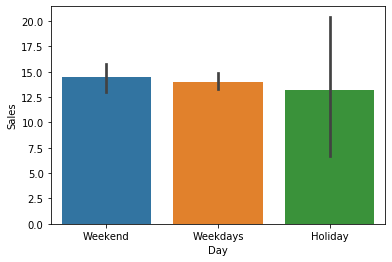

In [94]:
#importing Libraries 
import matplotlib.pyplot as plt 
import seaborn as sn 
%matplotlib inline  
#Makes sure that the graph is drawn beneath the code 
sn.barplot(x = 'Day', y = 'Sales', data = advertising_df);  #code for bargraph

In [95]:
# insights: Represents that the difference between the sales wrt to Day is very less. However, the confidence level varies

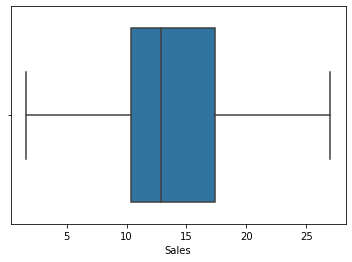

In [96]:
sn.boxplot(advertising_df['Sales']); #Code of BoxPlot

In [97]:
# insights: There are no Outliers as the box plot is coming in a specific range

# Spliting the Dataset into Train:Test = 70:30

In [98]:
#importing libraries 
from sklearn.model_selection import train_test_split 
import statsmodels.api as sm 
X = sm.add_constant(encodeAdv)   #adding constant to the dataset and copying the set to X 
Y = advertising_df['Sales']           #Copying the Sales to Y 
#Spliting the dataset, 0.7 represents 70:30 ratio, 87 is seed for the randomisation 
train_X, test_X, train_y, test_y = train_test_split( X ,Y,train_size = 0.7,random_state = 87 )

# Building the model

In [99]:
advertisingmodel = sm.OLS(train_y,train_X).fit() 
advertisingmodel.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     -0.009  
Dependent Variable: Sales            AIC:                843.3373
Date:               2020-08-12 20:08 BIC:                860.8572
No. Observations:   137              Log-Likelihood:     -415.67 
Df Model:           5                F-statistic:        0.7536  
Df Residuals:       131              Prob (F-statistic): 0.585   
R-squared:          0.028            Scale:              26.445  
------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
const          9.3158    3.6073   2.5824  0.0109   2.1796  16.4520
TV             0.0027    0.0072   0.3752  0.7082  -0.0116   0.0170
Radio          0.0044    0.0315   0.1393  0.8894  -0.0580   0.0668
Newspaper     -0.0166    0.0224  -0.7409  0.4601  -0.0610   0.0278
Day_Weekdays   4.8040    3.1830   1.5093  0.1336  -1.4928  11.1008
Day_Weekend    5.3015    3.1354   1.6908  0.0932  -0.9011  11.5042
-----------------------------------------------------------------
Omnibus:              6.007        Durbin-Watson:           1.906
Prob(Omnibus):        0.050        Jarque-Bera (JB):        5.512
Skew:                 0.424        Prob(JB):                0.064
Kurtosis:             2.502        Condition No.:           2133 
=================================================================
* The condition number is large (2e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

In [100]:
#R-squared says only 1.7% is explained. 
#Adj-R-sqaured is negative. Prob(F-stat) is greater than 0.05, and the model is not a good fit. 
#Significant Variables are Days_Weekdays and Days_Weekends only. We need to improve model by removing variables

#  Multi-Collinearity

## VIF checked

In [101]:
xColumns = encodeAdv.columns #Saving Columns of Dependent Variable

In [102]:
from statsmodels.stats.outliers_influence import variance_inflation_factor             
#importing Package
def get_vif_factors( X ):                                                             
    #Func to calculate Variance   
    vif = [ variance_inflation_factor( X.values, i ) for i in range( X.shape[1] ) ]    
    #Loop to calculate Variance    
    vif_factors = pd.DataFrame()                                                       
    #Creating DataFrame for Display   
    vif_factors['column'] = X.columns                                                 
    #Creating Column for columns Names    
    vif_factors['vif'] = vif                                                          
    #Adding respective VIF   
    return vif_factors                                                                 
#Return DataFrame


In [103]:
vif_factors = get_vif_factors( X[xColumns] )    #Calling func 
vif_factors                                    #Printing DataFrame


,column,vif
0,TV,5.972512
1,Radio,3.930583
2,Newspaper,3.499641
3,Day_Weekdays,4.513938
4,Day_Weekend,4.048673


In [104]:
highVIF = vif_factors[vif_factors.vif > 4].column #finding columns with high vif and are correlated 
highVIF #printing

0              TV
3    Day_Weekdays
4     Day_Weekend
Name: column, dtype: object

In [105]:
columnsToDelete = ['TV','Day_Weekend','Day_Weekdays'] #Columns to be deleted


In [106]:
xNewColumns = list(set(xColumns)-set(columnsToDelete)) #Removing columns 
get_vif_factors(X[xNewColumns])                        #Checking New VIF


,column,vif
0,Newspaper,2.804843
1,Radio,2.804843


In [107]:
#VIF are less than 4, running new model 
train_X=train_X[xNewColumns]             
#Changing to new columns only 
advertisingmodeltwo = sm.OLS(train_y,train_X).fit()  
#Running the new model 
advertisingmodeltwo.summary2()                       #Display the summary

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Ordinary least squares
==============================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.653   
Dependent Variable:     Sales            AIC:                         987.3321
Date:                   2020-08-12 20:09 BIC:                         993.1721
No. Observations:       137              Log-Likelihood:              -491.67 
Df Model:               2                F-statistic:                 130.1   
Df Residuals:           135              Prob (F-statistic):          3.25e-32
R-squared (uncentered): 0.658            Scale:                       77.823  
-----------------------------------------------------------------------------------
               Coef.       Std.Err.        t         P>|t|       [0.025      0.975]
-----------------------------------------------------------------------------------
Newspaper      0.1509        0.0339      4.4530      0.0000      0.0839      0.2180
Radio          0.2569        0.0465      5.5246      0.0000      0.1649      0.3488
------------------------------------------------------------------------------
Omnibus:                  0.513             Durbin-Watson:               1.719
Prob(Omnibus):            0.774             Jarque-Bera (JB):            0.480
Skew:                     -0.142            Prob(JB):                    0.787
Kurtosis:                 2.937             Condition No.:               3    
==============================================================================

"""

In [108]:
#New Model has Adj.R.sqr explains 67.2% model. 70% is required. Prob(F-Stat) is less than 0.05 which shows that model is a very good fit.

# Residual Analysis

# Normal Distribution checked

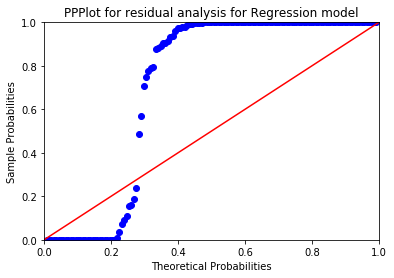

In [109]:
#Libraries are already imported 
probPlot = sm.ProbPlot(advertisingmodeltwo.resid); 
# Returns Residual ie difference between observed and fitted values.
probPlot.ppplot(line='45');                # Sets the Normal line to 45 degree 
plt.title("PPPlot for residual analysis for Regression model") #Sets the title of Graph 
plt.show() #Used to show Plot Residual vs Normal Distribution

In [110]:
#The points are not close to the red line which shows that the errors are not distributed normally.


# Constant Variance checked

In [111]:
def getStandVals( vals ):          #Defining Function to calculate Std Values    
    return (vals - vals.mean())/vals.std()    #Return Statement

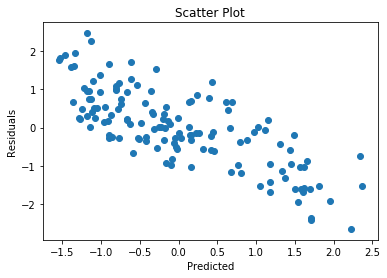

In [112]:
plt.scatter(getStandVals(advertisingmodeltwo.fittedvalues),getStandVals(advertisingmodeltwo.resid)) 
#Generate Scatter plt errors vs prediction 
plt.title("Scatter Plot") #Set title
plt.xlabel("Predicted")   #X-Axis Title 
plt.ylabel("Residuals")   #Y-Axis Title 
plt.show()                #Show Graph

In [113]:
# Not Parallel Line - Heteroscedasticity - Residuals doesnt have constant variance

# Outlier Analysis

# Z-Score checked

In [114]:
from scipy.stats import zscore  #importing package to calculate z-score 
advertising_df['zScoreSales'] = zscore(advertising_df.Sales) 
#Adding new Column 'zScoreSales' and putting z-scores for outlier 
advertising_df[(advertising_df.zScoreSales>3.0)|(advertising_df.zScoreSales<-3)] #Printing Outliers with zscore of > 3 or < -3

,Sno,TV,Radio,Newspaper,Day,Sales,zScoreSales


In [115]:
#No Outliers Found from Z-Score

# Leverage Value checked

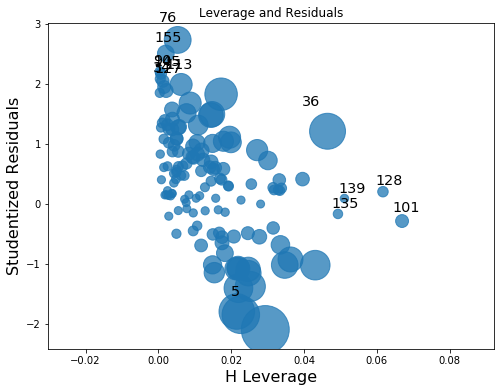

In [116]:
#Leverage for Finding Influencing observations 

from statsmodels.graphics.regressionplots import influence_plot 
#impoting package 
fig, ax = plt.subplots( figsize=(8,6) )   #Set the size 
influence_plot( advertisingmodeltwo, ax = ax )    #making influence plot 
plt.title( "Leverage and Residuals")      #Setting title 
plt.show();                               #Showing Graph

In [117]:
#Leverage Value of More than 3(k+1)/n ie 3(2+1)/197 = 0.065 approx. Hence, observations at 101 and 165 should be removed

In [118]:
advertising_df[advertising_df.index.isin([101,165])] #Printing the observations that needs to be removed

,Sno,TV,Radio,Newspaper,Day,Sales,zScoreSales
101,102,296.4,36.3,100.9,Weekend,22.1,1.544276
165,166,234.5,3.4,84.8,Weekend,25.4,2.181452


In [154]:
newTrainX = train_X.drop( [101,155]) #Dropping observation from x-axis 
newTrainY = train_y.drop( [101,155]) #Dropping observation from y-axis

In [155]:
advertisingmodelthree = sm.OLS(newTrainY,newTrainX).fit()  #Running the new model 
advertisingmodelthree.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Ordinary least squares
==============================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.656   
Dependent Variable:     Sales            AIC:                         968.6915
Date:                   2020-08-12 20:46 BIC:                         974.5021
No. Observations:       135              Log-Likelihood:              -482.35 
Df Model:               2                F-statistic:                 129.9   
Df Residuals:           133              Prob (F-statistic):          5.33e-32
R-squared (uncentered): 0.661            Scale:                       75.408  
-----------------------------------------------------------------------------------
               Coef.       Std.Err.        t         P>|t|       [0.025      0.975]
-----------------------------------------------------------------------------------
Newspaper      0.1556        0.0343      4.5329      0.0000      0.0877      0.2235
Radio          0.2502        0.0462      5.4178      0.0000      0.1588      0.3415
------------------------------------------------------------------------------
Omnibus:                  1.090             Durbin-Watson:               1.762
Prob(Omnibus):            0.580             Jarque-Bera (JB):            1.015
Skew:                     -0.210            Prob(JB):                    0.602
Kurtosis:                 2.939             Condition No.:               3    
==============================================================================

"""

# Cook's Distance checked

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


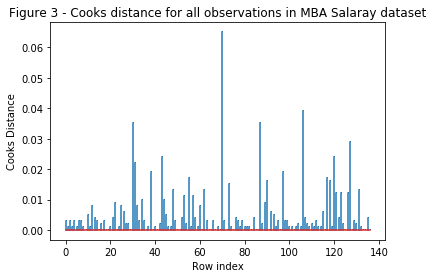

In [128]:

import numpy as np 
mba_influence = advertisingmodeltwo.get_influence() 
(c, p) = mba_influence.cooks_distance 
plt.stem( np.arange( len( train_X) ), np.round( c, 3 ), markerfmt="," );
plt.title( "Figure 3 - Cooks distance for all observations in MBA Salaray dataset" );
plt.xlabel( "Row index") 
plt.ylabel( "Cooks Distance"); 

# The RMSE for Validation of data.

In [129]:
from sklearn.metrics import r2_score, mean_squared_error

In [142]:
pred_y = advertisingmodel.predict( test_X ) # Prediction on Validation set

In [143]:
import numpy

In [144]:
np.sqrt(mean_squared_error(test_y, pred_y))

5.576791712003233

In [145]:
np.abs(r2_score(test_y, pred_y))

0.08480814575294304

In [146]:
predY = np.power( advertisingmodelthree.predict( test_X[newTrainX.columns] ), 2) 
#Saving Predicted Value in predY

In [147]:
#RMSE For Validation
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(predY, test_y))

172.47525790652256

# Manual Calculation

In [136]:
advertising_df[1:2] 
#picking one Data

,Sno,TV,Radio,Newspaper,Day,Sales,zScoreSales
1,2,44.5,39.3,45.1,Weekdays,8.0,-1.178201


In [137]:
# Model 1 - Equation --> Sales = 8.57 + 0.0066TV + 0.0056Radio - 0.0212Newspaper + 4.7365Day_Weekday + 3.841*Day_Weekend

In [138]:
8.57+0.0066*44.5+0.0056*39.3-0.0212*45.1+4.7365

12.864159999999998

In [139]:
# Model 2 - Equation --> Sales = 0.2951Radio + 0.1138Newspaper 

In [140]:
0.2951*39.3 + 0.1138*45.1

16.729809999999997